In [61]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

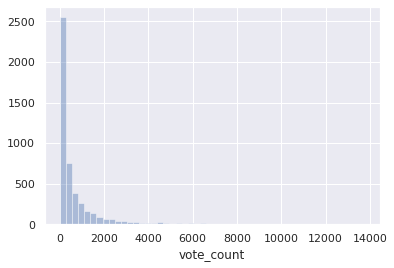

In [7]:
sns.set()
sns.distplot(df['vote_count'], norm_hist=False,   kde=False)

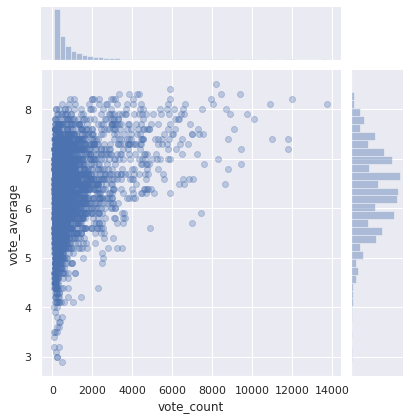

In [12]:
sns.jointplot(df['vote_count'],df['vote_average'],alpha=0.3)

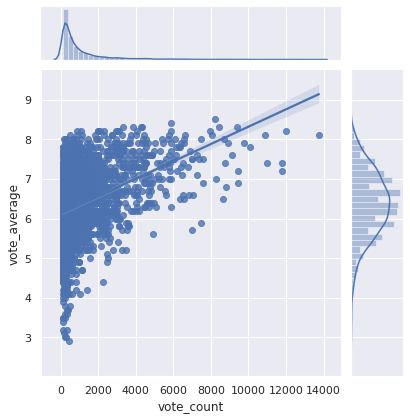

In [32]:
df = df[df['vote_count'] > 100]
sns.jointplot(df['vote_count'],df['vote_average'],kind='reg')

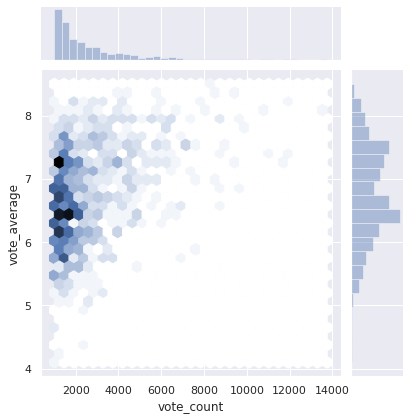

In [16]:
sns.jointplot(df['vote_count'],df['vote_average'],kind='hex')

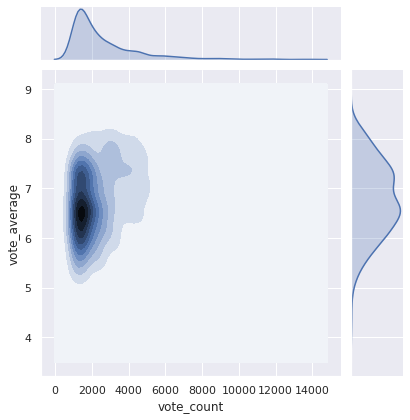

In [17]:
sns.jointplot(df['vote_count'],df['vote_average'],kind='kde')

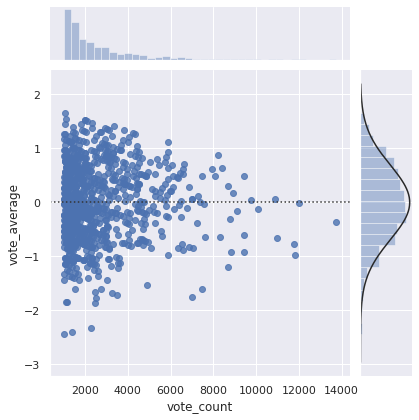

In [18]:
sns.jointplot(df['vote_count'],df['vote_average'],kind='resid')

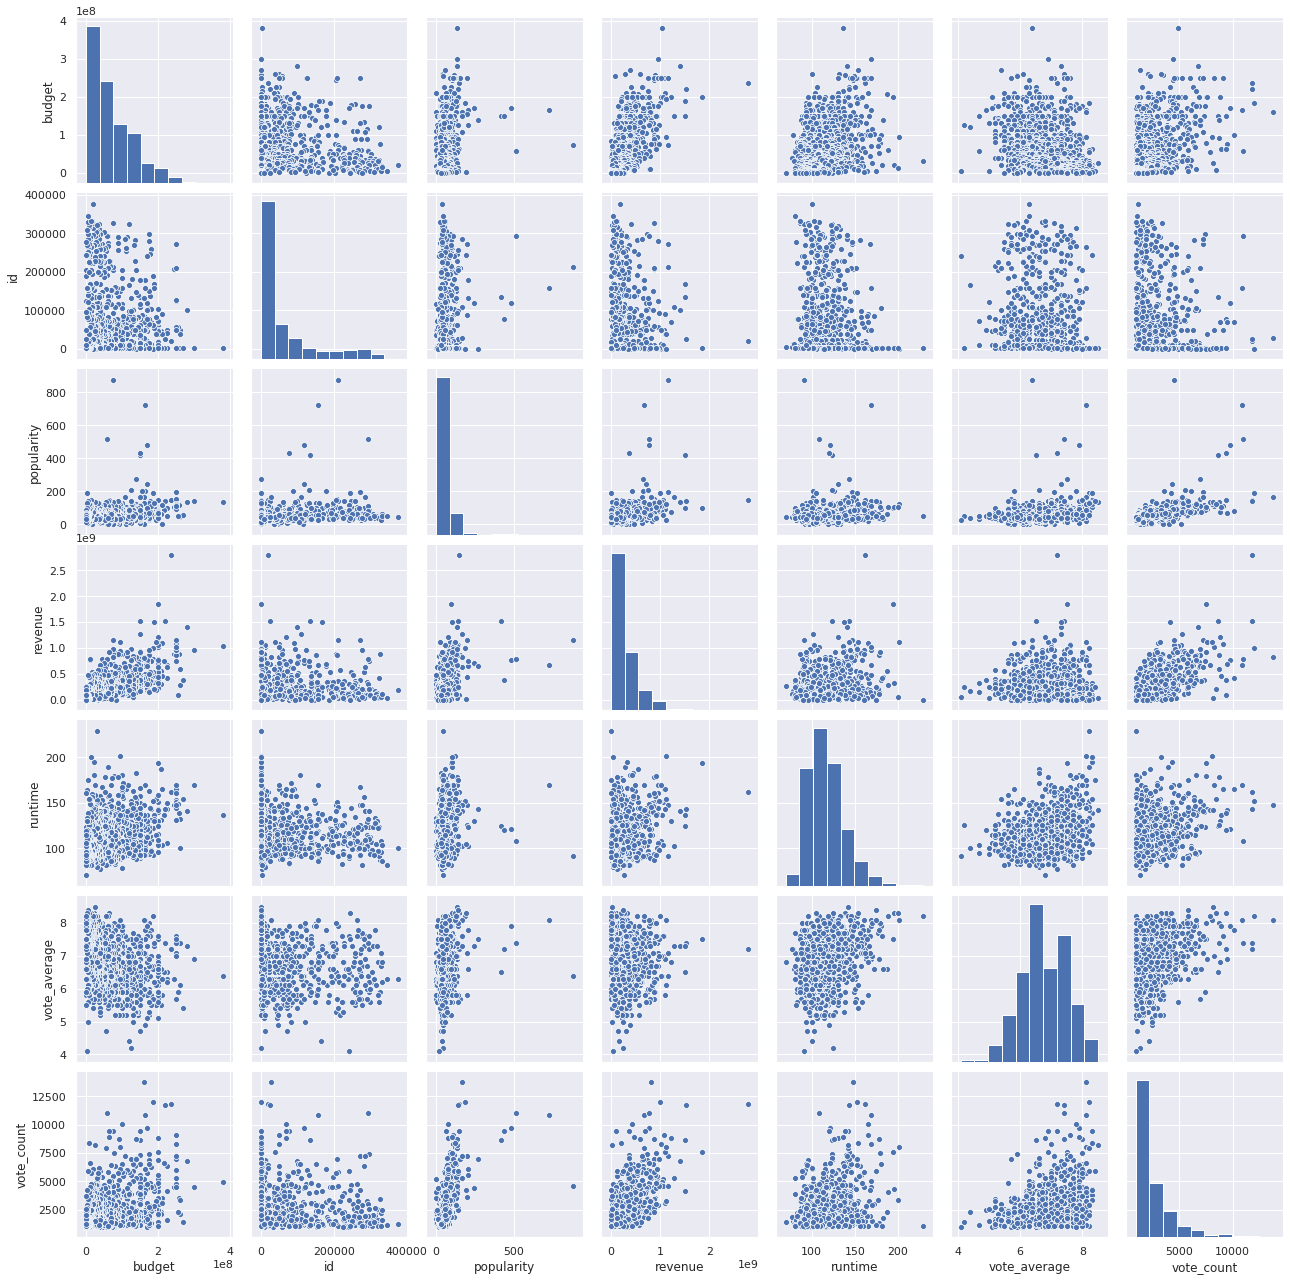

In [19]:
sns.pairplot(df)

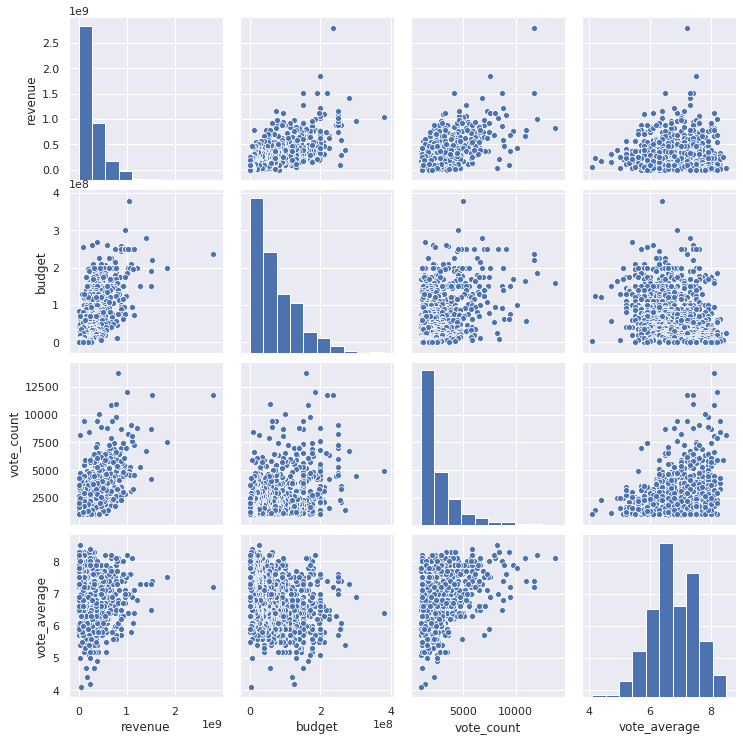

In [20]:
sns.pairplot(df[['revenue','budget','vote_count','vote_average']])

In [30]:
med = df['vote_average'].median()
df['evaluation'] = df['vote_average'].apply(lambda x: 'low' if x < med else 'high')

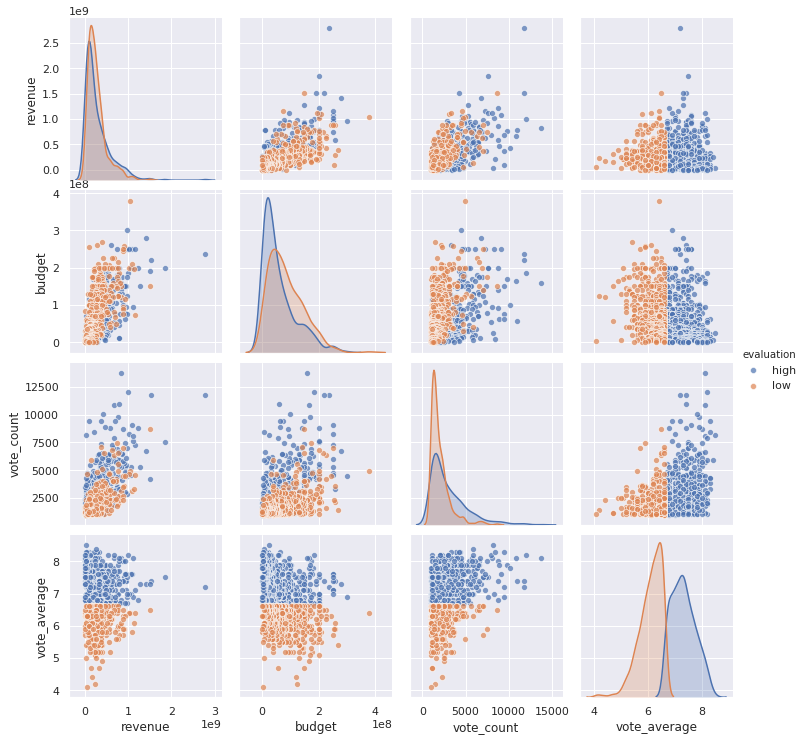

In [26]:
sns.pairplot(df[['revenue','budget','vote_count','vote_average','evaluation']],
            hue='evaluation',
            plot_kws={'alpha':0.7})

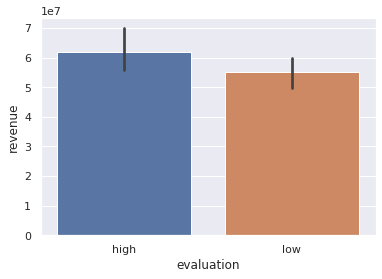

In [36]:
sns.barplot(x='evaluation', y='revenue', data=df, estimator=np.median)

In [50]:
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))
df['decade'] = df['release_date'].apply(lambda x: (x[:3] + '0s'))

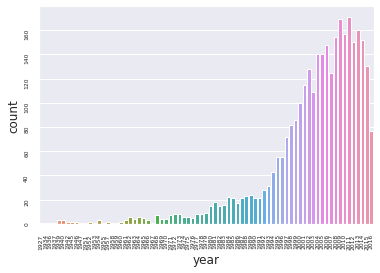

In [48]:
ax = sns.countplot(x='year',data=df)
ax.tick_params(rotation=90, labelsize=6)

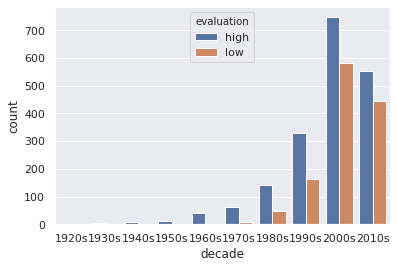

In [54]:
ax = sns.countplot(x='decade',data=df.sort_values('decade'), hue='evaluation')


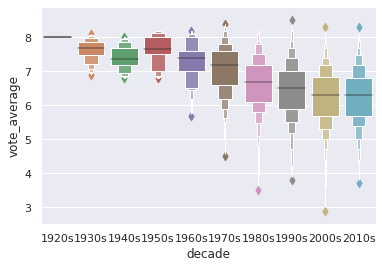

In [57]:
sns.boxenplot(x='decade',y='vote_average',data=df.sort_values('decade'))

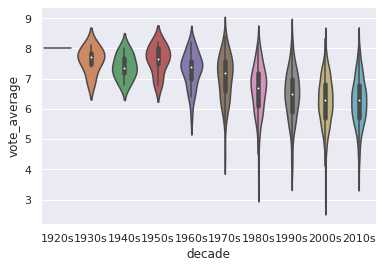

In [58]:
sns.violinplot(x='decade',y='vote_average',data=df.sort_values('decade'))

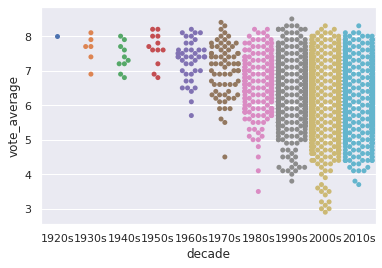

In [59]:
sns.swarmplot(x='decade',y='vote_average',data=df.sort_values('decade'))

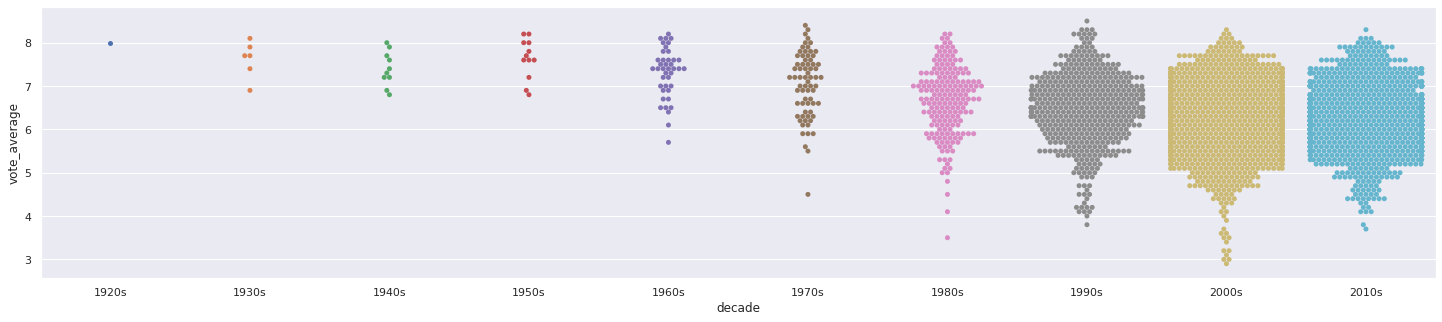

In [63]:
fig, ax = plt.subplots(figsize=(25,5))
sns.swarmplot(ax=ax,x='decade',y='vote_average',data=df.sort_values('decade'))

In [65]:
df = pd.read_csv('dataset/tmdb_5000_movies.csv')

In [71]:
df = df[(df != 0).all(axis=1)]

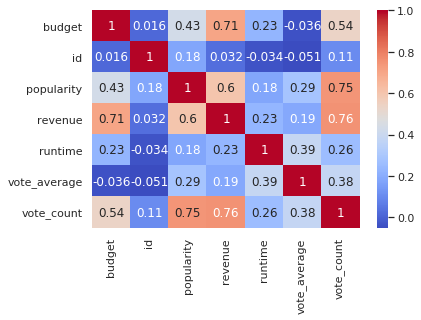

In [80]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [81]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])


In [95]:
df_

,year,month,revenue
0,1916,09,8.394751e+06
1,1925,11,2.200000e+07
2,1927,01,6.504220e+05
3,1929,02,4.358000e+06
4,1930,11,8.000000e+06
...,...,...,...
567,2016,05,2.747345e+08
568,2016,06,2.562691e+08
569,2016,07,1.703382e+08
570,2016,08,3.275855e+08


In [92]:
df_ = df.groupby(['year','month']).mean()['revenue'].reset_index().sort_values(['year','month'])
df_.pivot_table(values='revenue',
    index='month',
    columns='year')

year,1916,1925,1927,1929,1930,1932,1933,1934,1935,1936,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,,,,,,,,,,,,,
01,NaN,NaN,650422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.635086e+07,8.548517e+07,6.712600e+07,4.440869e+07,8.108325e+07,1.114278e+08,7.105923e+07,9.265205e+07,3.897096e+07,1.104857e+08
02,NaN,NaN,NaN,4358000.0,NaN,NaN,2240500.0,4500000.0,NaN,8500000.0,...,7.749721e+07,1.103606e+08,6.743382e+07,1.030667e+08,7.436204e+07,1.072104e+08,9.485649e+07,1.268837e+08,1.377840e+08,1.132806e+08
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.490862e+07,2.999256e+07,1.339757e+08,1.676966e+08,9.179089e+07,1.838416e+08,1.722818e+08,2.292273e+08,1.693319e+08,2.198517e+08
04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.758093e+07,1.365654e+08,9.335484e+07,1.262502e+08,1.650838e+08,2.000062e+08,1.894902e+08,1.526641e+08,3.651596e+08,3.031371e+08
05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.892281e+08,2.466259e+08,2.880007e+08,1.435772e+08,2.198116e+08,1.833446e+08,1.478546e+08,3.271891e+08,2.034467e+08,2.747345e+08
06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.486575e+08,2.470743e+08,2.012255e+08,2.247627e+08,2.986074e+08,2.625915e+08,3.484975e+08,3.533490e+08,4.528977e+08,2.562691e+08
07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.251360e+08,2.527264e+08,2.334799e+08,2.026511e+08,1.262491e+08,2.383139e+08,1.411227e+08,1.919401e+08,1.649625e+08,1.703382e+08
08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.963767e+07,5.439818e+07,9.607047e+07,1.271484e+08,8.856619e+07,7.244234e+07,1.068793e+08,1.328712e+08,7.813557e+07,3.275855e+08
09,8394751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3202000.0,NaN,...,5.993111e+07,4.608547e+07,4.362178e+07,7.367884e+07,5.038483e+07,9.054040e+07,8.997852e+07,6.541308e+07,1.508724e+08,1.586157e+07


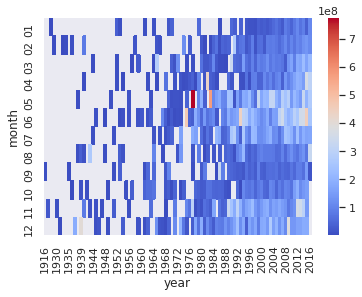

In [94]:
sns.heatmap(df_.pivot_table(values='revenue',
    index='month',
    columns='year'),cmap='coolwarm')